In [3]:
%matplotlib inline
import torch
from torch.distributions import multinomial
from torch.distributions import Normal
from d2l import torch as d2l

In [2]:
help(torch.sum)

Help on built-in function sum in module torch:

sum(...)
    sum(input, *, dtype=None) -> Tensor
    
    Returns the sum of all elements in the :attr:`input` tensor.
    
    Args:
        input (Tensor): the input tensor.
    
    Keyword args:
        dtype (:class:`torch.dtype`, optional): the desired data type of returned tensor.
            If specified, the input tensor is casted to :attr:`dtype` before the operation
            is performed. This is useful for preventing data type overflows. Default: None.
    
    Example::
    
        >>> a = torch.randn(1, 3)
        >>> a
        tensor([[ 0.1133, -0.9567,  0.2958]])
        >>> torch.sum(a)
        tensor(-0.5475)
    
    .. function:: sum(input, dim, keepdim=False, *, dtype=None) -> Tensor
       :noindex:
    
    Returns the sum of each row of the :attr:`input` tensor in the given
    dimension :attr:`dim`. If :attr:`dim` is a list of dimensions,
    reduce over all of them.
    
    
    If :attr:`keepdim` is ``True`

In [64]:
fair_probs = torch.ones([6]) / 6
multinomial.Multinomial(1, fair_probs).sample()

tensor([1., 0., 0., 0., 0., 0.])

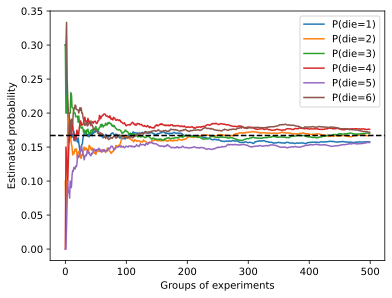

In [65]:
counts = multinomial.Multinomial(10, fair_probs).sample((500,))
cum_counts = counts.cumsum(dim=0)
estimates = cum_counts / cum_counts.sum(dim=1, keepdims=True)

d2l.set_figsize((6, 4.5))
for i in range(6):
    d2l.plt.plot(estimates[:, i].numpy(),
                 label=("P(die=" + str(i + 1) + ")"))
d2l.plt.axhline(y=0.167, color='black', linestyle='dashed')
d2l.plt.gca().set_xlabel('Groups of experiments')
d2l.plt.gca().set_ylabel('Estimated probability')
d2l.plt.legend();